## **IBM Telecome Customer Churn Prediction Model**


Customer churn prediction models are used in the telecommunications industry to identify customers who are at risk of canceling their services. The goal of the model is to predict which customers are likely to churn in the near future, so that the company can take proactive steps to retain them.

To build a churn prediction model, data is collected on various customer attributes such as demographics, usage patterns, customer service interactions, and billing information. This data is then used to train a machine learning model that can identify patterns and predict which customers are at risk of churning.

In [178]:
# Importing some of the libraries.
import pandas as pd
import numpy as np
import warnings
warnings.simplefilter('ignore')

In [179]:
# Loading our data set
df = pd.read_excel('Data/Telco_customer_churn.xlsx')

In [180]:
df.head()

,CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,...,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Score,CLTV,Churn Reason
0,3668-QPYBK,1,United States,California,Los Angeles,90003,"33.964131, -118.272783",33.964131,-118.272783,Male,...,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1,86,3239,Competitor made better offer
1,9237-HQITU,1,United States,California,Los Angeles,90005,"34.059281, -118.30742",34.059281,-118.307420,Female,...,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1,67,2701,Moved
2,9305-CDSKC,1,United States,California,Los Angeles,90006,"34.048013, -118.293953",34.048013,-118.293953,Female,...,Month-to-month,Yes,Electronic check,99.65,820.5,Yes,1,86,5372,Moved
3,7892-POOKP,1,United States,California,Los Angeles,90010,"34.062125, -118.315709",34.062125,-118.315709,Female,...,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes,1,84,5003,Moved
4,0280-XJGEX,1,United States,California,Los Angeles,90015,"34.039224, -118.266293",34.039224,-118.266293,Male,...,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.3,Yes,1,89,5340,Competitor had better devices


### Understanding The Data 😬

- **CustomerID:** A unique ID that identifies each customer.

- **Count:** A value used in reporting/dashboarding to sum up the number of customers in a filtered set.

- **Country:** The country of the customer’s primary residence.

- **State:** The state of the customer’s primary residence.

- **City:** The city of the customer’s primary residence.

- **Zip Code:** The zip code of the customer’s primary residence.

- **Lat Long:** The combined latitude and longitude of the customer’s primary residence.

- **Latitude:** The latitude of the customer’s primary residence.

- **Longitude:** The longitude of the customer’s primary residence.

- **Gender:** The customer’s gender: Male, Female

- **Senior Citizen:** Indicates if the customer is 65 or older: Yes, No

- **Partner:** Indicate if the customer has a partner: Yes, No

- **Dependents:** Indicates if the customer lives with any dependents: Yes, No. Dependents could be children, parents, grandparents, etc.

- **Tenure Months:** Indicates the total amount of months that the customer has been with the company by the end of the quarter specified above.

- **Phone Service:** Indicates if the customer subscribes to home phone service with the company: Yes, No

- **Multiple Lines:** Indicates if the customer subscribes to multiple telephone lines with the company: Yes, No

- **Internet Service:** Indicates if the customer subscribes to Internet service with the company: No, DSL, Fiber Optic, Cable.

- **Online Security:** Indicates if the customer subscribes to an additional online security service provided by the company: Yes, No

- **Online Backup:** Indicates if the customer subscribes to an additional online backup service provided by the company: Yes, No

- **Device Protection:** Indicates if the customer subscribes to an additional device protection plan for their Internet equipment provided by the company: Yes, No

- **Tech Support:** Indicates if the customer subscribes to an additional technical support plan from the company with reduced wait times: Yes, No

- **Streaming TV:** Indicates if the customer uses their Internet service to stream television programing from a third party provider: Yes, No. The company does not charge an additional fee for this service.

- **Streaming Movies:** Indicates if the customer uses their Internet service to stream movies from a third party provider: Yes, No. The company does not charge an additional fee for this service.

- **Contract:** Indicates the customer’s current contract type: Month-to-Month, One Year, Two Year.

- **Paperless Billing:** Indicates if the customer has chosen paperless billing: Yes, No

- **Payment Method:** Indicates how the customer pays their bill: Bank Withdrawal, Credit Card, Mailed Check

- **Monthly Charge:** Indicates the customer’s current total monthly charge for all their services from the company.

- **Total Charges:** Indicates the customer’s total charges, calculated to the end of the quarter specified above.

- **Churn Label:** Yes = the customer left the company this quarter. No = the customer remained with the company. Directly related to Churn Value.

- **Churn Value:** 1 = the customer left the company this quarter. 0 = the customer remained with the company. Directly related to Churn Label.

- **Churn Score:** A value from 0-100 that is calculated using the predictive tool IBM SPSS Modeler. The model incorporates multiple factors known to cause churn. The higher the score, the more likely the customer will churn.

- **CLTV:** Customer Lifetime Value. A predicted CLTV is calculated using corporate formulas and existing data. The higher the value, the more valuable the customer. High value customers should be monitored for churn.

- **Churn Reason:** A customer’s specific reason for leaving the company. Directly related to Churn Category.

In [181]:
print(f'There are {df.shape[0]} rows, and {df.shape[1]} Columns.')

There are 7043 rows, and 33 Columns.


In [182]:
df.dtypes

CustomerID            object
Count                  int64
Country               object
State                 object
City                  object
Zip Code               int64
Lat Long              object
Latitude             float64
Longitude            float64
Gender                object
Senior Citizen        object
Partner               object
Dependents            object
Tenure Months          int64
Phone Service         object
Multiple Lines        object
Internet Service      object
Online Security       object
Online Backup         object
Device Protection     object
Tech Support          object
Streaming TV          object
Streaming Movies      object
Contract              object
Paperless Billing     object
Payment Method        object
Monthly Charges      float64
Total Charges         object
Churn Label           object
Churn Value            int64
Churn Score            int64
CLTV                   int64
Churn Reason          object
dtype: object

###### **Most of our data is an object and machine did not understand this machine only understand numbers so we have to change it into integers.**

In [183]:
# Lets see the Descriptive Statistics.
df.describe()

,Count,Zip Code,Latitude,Longitude,Tenure Months,Monthly Charges,Churn Value,Churn Score,CLTV
count,7043.0,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,1.0,93521.964646,36.282441,-119.798880,32.371149,64.761692,0.265370,58.699418,4400.295755
std,0.0,1865.794555,2.455723,2.157889,24.559481,30.090047,0.441561,21.525131,1183.057152
min,1.0,90001.000000,32.555828,-124.301372,0.000000,18.250000,0.000000,5.000000,2003.000000
25%,1.0,92102.000000,34.030915,-121.815412,9.000000,35.500000,0.000000,40.000000,3469.000000
50%,1.0,93552.000000,36.391777,-119.730885,29.000000,70.350000,0.000000,61.000000,4527.000000
75%,1.0,95351.000000,38.224869,-118.043237,55.000000,89.850000,1.000000,75.000000,5380.500000
max,1.0,96161.000000,41.962127,-114.192901,72.000000,118.750000,1.000000,100.000000,6500.000000


The average Tenure - 32 months, and 75% customers are less than 55 months.
The Average Monthly Charges are 64 dollars, and 75% customers pay less than 89 Dollars.

In [184]:
# Lets Explore the Churn Column.
df['Churn Score'].value_counts()


80    151
71    148
77    145
67    143
76    141
     ... 
88     33
9       3
8       2
7       2
5       1
Name: Churn Score, Length: 85, dtype: int64

In [185]:
# Lets Explore the Churn Column.
df['Churn Value'].value_counts()

0    5174
1    1869
Name: Churn Value, dtype: int64

Here you see we have imbalanced data


In [186]:
# If we see the Percentage.
100*df['Churn Value'].value_counts()/len(df['Churn Value'])

0    73.463013
1    26.536987
Name: Churn Value, dtype: float64

In [187]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 33 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CustomerID         7043 non-null   object 
 1   Count              7043 non-null   int64  
 2   Country            7043 non-null   object 
 3   State              7043 non-null   object 
 4   City               7043 non-null   object 
 5   Zip Code           7043 non-null   int64  
 6   Lat Long           7043 non-null   object 
 7   Latitude           7043 non-null   float64
 8   Longitude          7043 non-null   float64
 9   Gender             7043 non-null   object 
 10  Senior Citizen     7043 non-null   object 
 11  Partner            7043 non-null   object 
 12  Dependents         7043 non-null   object 
 13  Tenure Months      7043 non-null   int64  
 14  Phone Service      7043 non-null   object 
 15  Multiple Lines     7043 non-null   object 
 16  Internet Service   7043 

## **Data Cleaning 🧽**

In [188]:
df.head(3)

,CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,...,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Score,CLTV,Churn Reason
0,3668-QPYBK,1,United States,California,Los Angeles,90003,"33.964131, -118.272783",33.964131,-118.272783,Male,...,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1,86,3239,Competitor made better offer
1,9237-HQITU,1,United States,California,Los Angeles,90005,"34.059281, -118.30742",34.059281,-118.307420,Female,...,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1,67,2701,Moved
2,9305-CDSKC,1,United States,California,Los Angeles,90006,"34.048013, -118.293953",34.048013,-118.293953,Female,...,Month-to-month,Yes,Electronic check,99.65,820.5,Yes,1,86,5372,Moved


In [189]:
#Removing unnecessary Columns
df.drop(['CustomerID','State','City', 'Lat Long','Count', 'Country', 'Zip Code', 'Latitude', 'Longitude', 'Churn Value', 'Churn Score'], axis=1, inplace=True)


In [190]:
df.head(3)

,Gender,Senior Citizen,Partner,Dependents,Tenure Months,Phone Service,Multiple Lines,Internet Service,Online Security,Online Backup,...,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,CLTV,Churn Reason
0,Male,No,No,No,2,Yes,No,DSL,Yes,Yes,...,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,3239,Competitor made better offer
1,Female,No,No,Yes,2,Yes,No,Fiber optic,No,No,...,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,2701,Moved
2,Female,No,No,Yes,8,Yes,Yes,Fiber optic,No,No,...,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes,5372,Moved


In [191]:
df.isnull().sum()

Gender                  0
Senior Citizen          0
Partner                 0
Dependents              0
Tenure Months           0
Phone Service           0
Multiple Lines          0
Internet Service        0
Online Security         0
Online Backup           0
Device Protection       0
Tech Support            0
Streaming TV            0
Streaming Movies        0
Contract                0
Paperless Billing       0
Payment Method          0
Monthly Charges         0
Total Charges           0
Churn Label             0
CLTV                    0
Churn Reason         5174
dtype: int64

In [192]:
df.drop('Churn Reason', axis=1, inplace=True)


In [193]:
df.shape

(7043, 21)

In [194]:
df.isnull().sum()

Gender               0
Senior Citizen       0
Partner              0
Dependents           0
Tenure Months        0
Phone Service        0
Multiple Lines       0
Internet Service     0
Online Security      0
Online Backup        0
Device Protection    0
Tech Support         0
Streaming TV         0
Streaming Movies     0
Contract             0
Paperless Billing    0
Payment Method       0
Monthly Charges      0
Total Charges        0
Churn Label          0
CLTV                 0
dtype: int64

In [195]:
df.duplicated().sum()

0

In [196]:
df.shape


(7043, 21)

## **Exploratory Data Analysis 🫰**

In [197]:
df.columns

Index(['Gender', 'Senior Citizen', 'Partner', 'Dependents', 'Tenure Months',
       'Phone Service', 'Multiple Lines', 'Internet Service',
       'Online Security', 'Online Backup', 'Device Protection', 'Tech Support',
       'Streaming TV', 'Streaming Movies', 'Contract', 'Paperless Billing',
       'Payment Method', 'Monthly Charges', 'Total Charges', 'Churn Label',
       'CLTV'],
      dtype='object')

In [198]:
# importing the libraries that are needed for plotting Graphs.
import matplotlib.pyplot as plt
import seaborn as sns


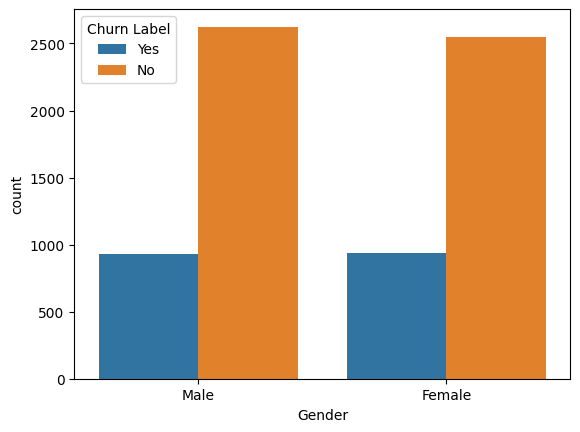

In [199]:
sns.countplot(x = 'Gender', hue = 'Churn Label', data = df)
plt.show()

- The Gender Male and Female are having the almost same number of churn and non-churn members.

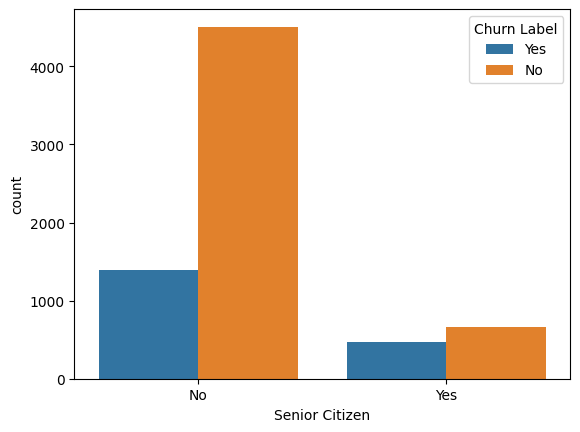

In [200]:
sns.countplot(x = 'Senior Citizen', hue = 'Churn Label', data = df)
plt.show()


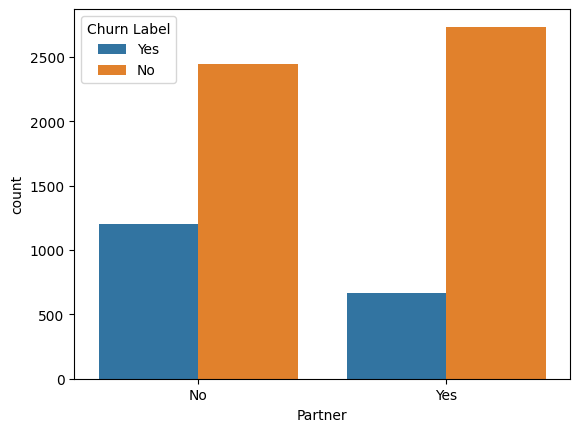

In [201]:
sns.countplot(x = 'Partner', hue = 'Churn Label', data = df)
plt.show()

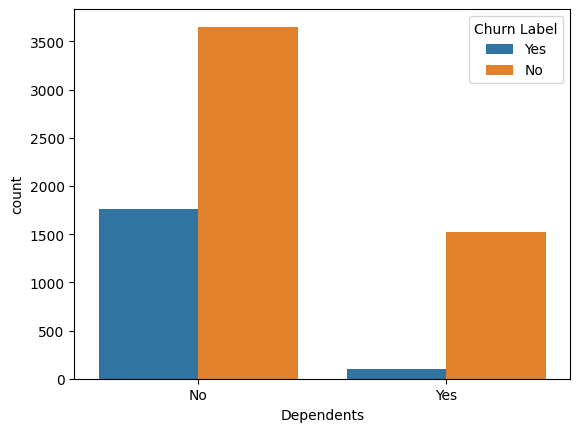

In [202]:
sns.countplot(x = 'Dependents', hue = 'Churn Label', data = df)
plt.show()

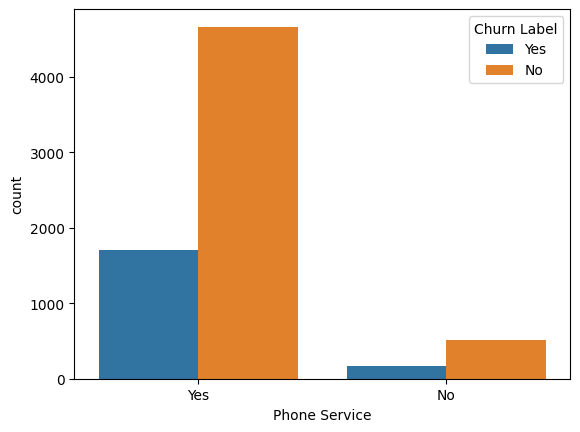

In [203]:
sns.countplot(x = 'Phone Service', hue = 'Churn Label', data = df)
plt.show()

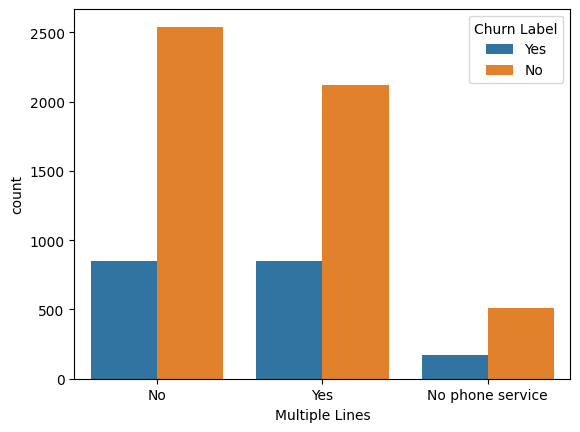

In [204]:
sns.countplot(x = 'Multiple Lines', hue = 'Churn Label', data = df)
plt.show()

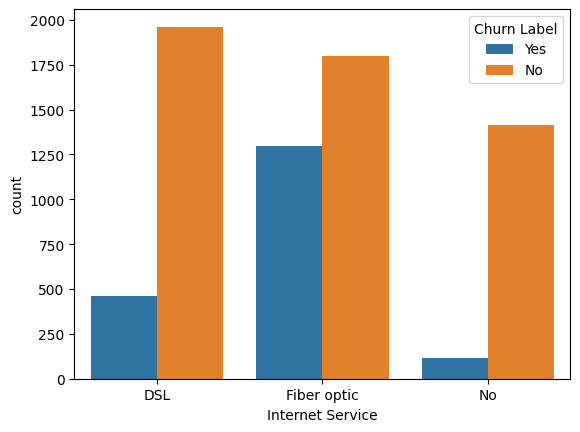

In [205]:
sns.countplot(x = 'Internet Service', hue = 'Churn Label', data = df)
plt.show()

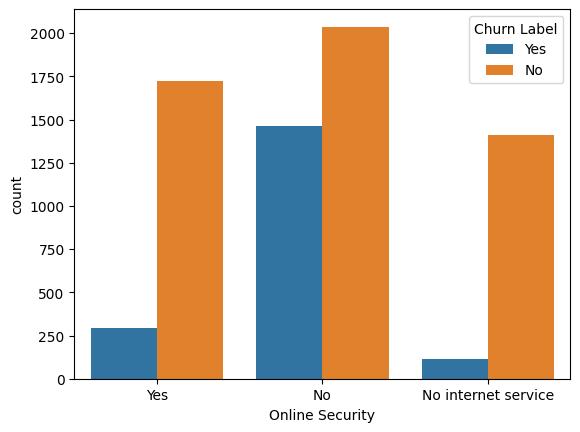

In [206]:
sns.countplot(x = 'Online Security', hue = 'Churn Label', data = df)
plt.show()

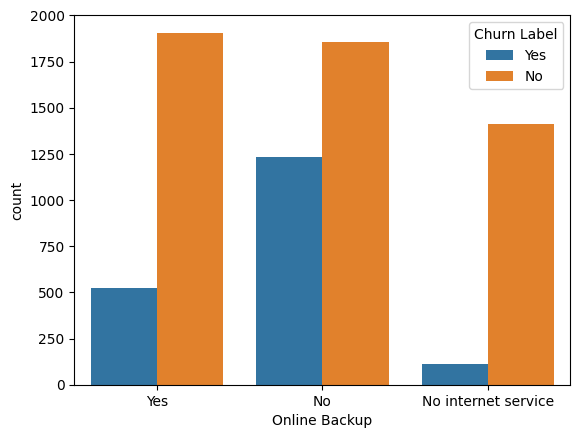

In [207]:
sns.countplot(x = 'Online Backup', hue = 'Churn Label', data = df)
plt.show()

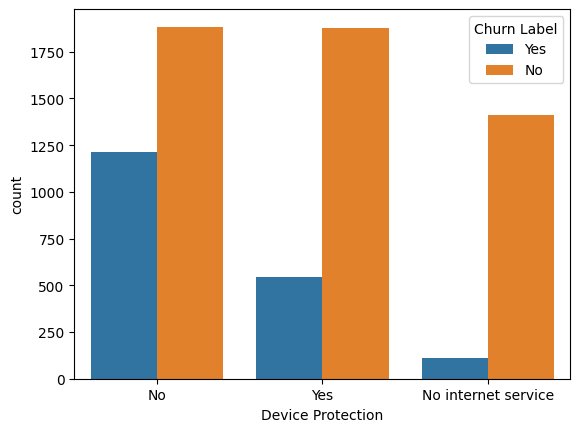

In [208]:
sns.countplot(x = 'Device Protection', hue = 'Churn Label', data = df)
plt.show()

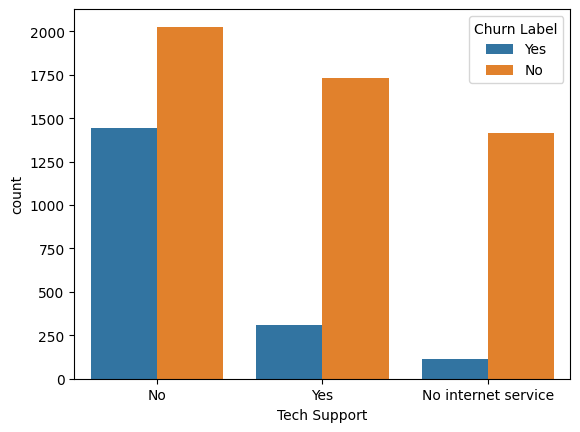

In [209]:
sns.countplot(x = 'Tech Support', hue = 'Churn Label', data = df)
plt.show()

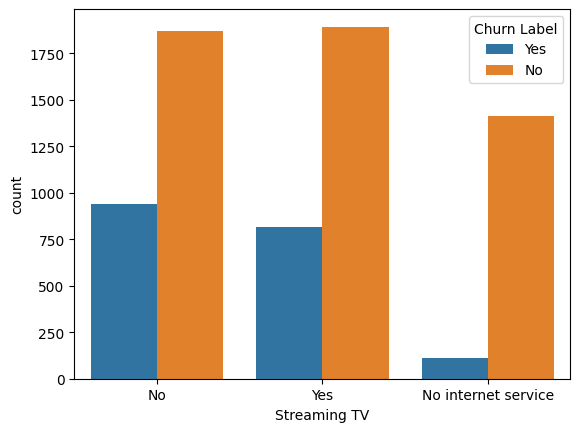

In [210]:
sns.countplot(x = 'Streaming TV', hue = 'Churn Label', data = df)
plt.show()

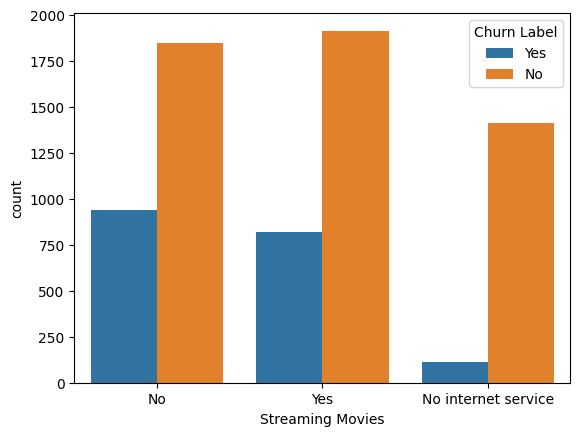

In [211]:
sns.countplot(x = 'Streaming Movies', hue = 'Churn Label', data = df)
plt.show()

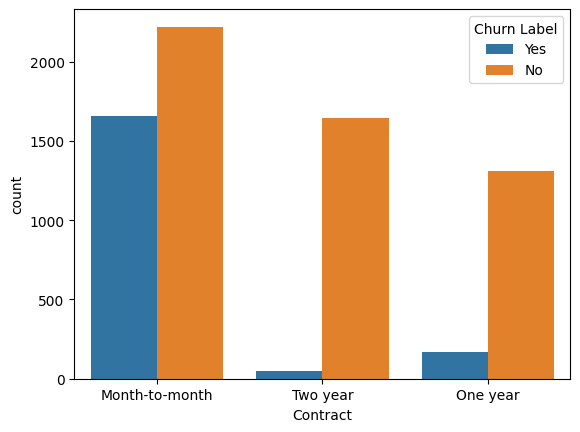

In [212]:
sns.countplot(x = 'Contract', hue = 'Churn Label', data = df)
plt.show()

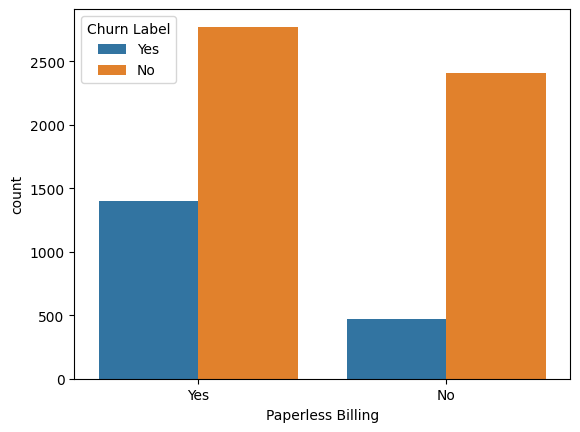

In [213]:
sns.countplot(x = 'Paperless Billing', hue = 'Churn Label', data = df)
plt.show()

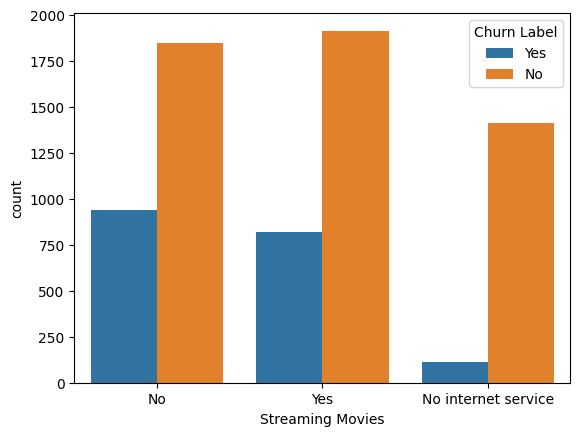

In [214]:
sns.countplot(x = 'Streaming Movies', hue = 'Churn Label', data = df)
plt.show()

<Axes: xlabel='Online Backup', ylabel='count'>

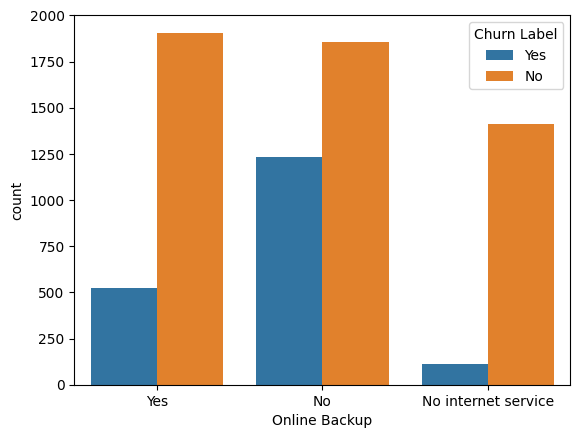

In [215]:
sns.countplot(x= 'Online Backup', hue = 'Churn Label', data = df)

<Axes: xlabel='Tech Support', ylabel='count'>

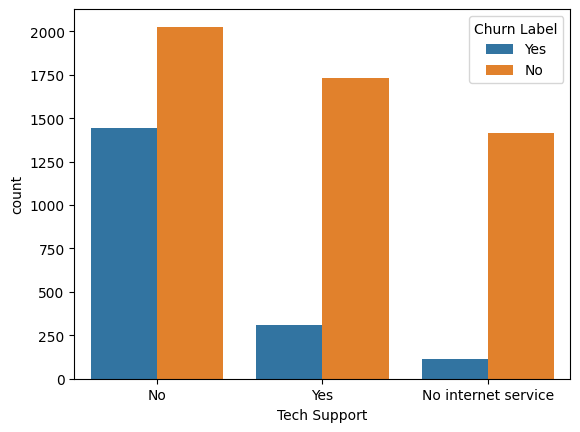

In [216]:
sns.countplot(x= 'Tech Support', hue = 'Churn Label', data = df)

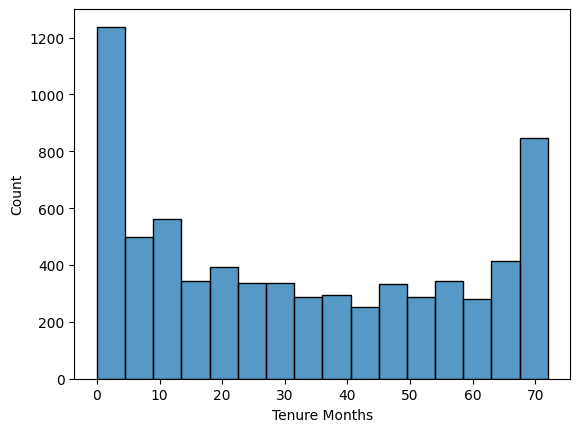

In [217]:
sns.histplot(x = 'Tenure Months', data = df)
plt.show()

## **Data Pre-Processing 🙂**

In [218]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             7043 non-null   object 
 1   Senior Citizen     7043 non-null   object 
 2   Partner            7043 non-null   object 
 3   Dependents         7043 non-null   object 
 4   Tenure Months      7043 non-null   int64  
 5   Phone Service      7043 non-null   object 
 6   Multiple Lines     7043 non-null   object 
 7   Internet Service   7043 non-null   object 
 8   Online Security    7043 non-null   object 
 9   Online Backup      7043 non-null   object 
 10  Device Protection  7043 non-null   object 
 11  Tech Support       7043 non-null   object 
 12  Streaming TV       7043 non-null   object 
 13  Streaming Movies   7043 non-null   object 
 14  Contract           7043 non-null   object 
 15  Paperless Billing  7043 non-null   object 
 16  Payment Method     7043 

-  We have to Change the all these values into numeric,because Machines can understand only numbers.

In [219]:
# Let's Explore one more time the dataframe, on which we can apply the label encoding.
df.head()

,Gender,Senior Citizen,Partner,Dependents,Tenure Months,Phone Service,Multiple Lines,Internet Service,Online Security,Online Backup,...,Tech Support,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,CLTV
0,Male,No,No,No,2,Yes,No,DSL,Yes,Yes,...,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,3239
1,Female,No,No,Yes,2,Yes,No,Fiber optic,No,No,...,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,2701
2,Female,No,No,Yes,8,Yes,Yes,Fiber optic,No,No,...,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes,5372
3,Female,No,Yes,Yes,28,Yes,Yes,Fiber optic,No,No,...,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes,5003
4,Male,No,No,Yes,49,Yes,Yes,Fiber optic,No,Yes,...,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.3,Yes,5340


In [220]:
df['Gender'].value_counts()

Male      3555
Female    3488
Name: Gender, dtype: int64

- We first Check if the data has two variables, if yes, then we do the label encoding and then we convert them into numeric.

In [221]:
from sklearn.preprocessing import LabelEncoder
lb = LabelEncoder()

In [222]:
df['Gender'] = lb.fit_transform(df['Gender'])

In [223]:
df['Gender'].value_counts()
#1 - Male and 0 - Female.

1    3555
0    3488
Name: Gender, dtype: int64

In [224]:
df['Senior Citizen'].value_counts()

No     5901
Yes    1142
Name: Senior Citizen, dtype: int64

In [225]:
df['Senior Citizen'] = lb.fit_transform(df['Senior Citizen'])

In [226]:
df['Senior Citizen'].value_counts()

0    5901
1    1142
Name: Senior Citizen, dtype: int64

In [227]:
df['Partner'].value_counts()

No     3641
Yes    3402
Name: Partner, dtype: int64

In [228]:
df['Partner'] = lb.fit_transform(df['Partner'])

In [229]:
df['Partner'].value_counts()

0    3641
1    3402
Name: Partner, dtype: int64

In [230]:
df['Dependents'].value_counts()

No     5416
Yes    1627
Name: Dependents, dtype: int64

In [231]:
df['Dependents'] = lb.fit_transform(df['Dependents'])

In [232]:
df['Dependents'].value_counts()

0    5416
1    1627
Name: Dependents, dtype: int64

In [233]:
df['Phone Service'].value_counts()

Yes    6361
No      682
Name: Phone Service, dtype: int64

In [234]:
df['Phone Service'] = lb.fit_transform(df['Phone Service'])

In [235]:
df['Phone Service'].value_counts()

1    6361
0     682
Name: Phone Service, dtype: int64

In [236]:
df['Multiple Lines'].value_counts()

No                  3390
Yes                 2971
No phone service     682
Name: Multiple Lines, dtype: int64

###### Here we can replace the no phone service as No, because when I compare to the phone service column, having No phone service leads to No multiplelines. If we have a mobile then only we can make otherwise we can't have multiple lines.

In [237]:
df['Multiple Lines'] = df['Multiple Lines'].replace('No phone service','No')


In [238]:
df['Multiple Lines'].value_counts()

No     4072
Yes    2971
Name: Multiple Lines, dtype: int64

In [239]:
df['Multiple Lines'] = lb.fit_transform(df['Multiple Lines'])

In [240]:
df['Multiple Lines'].value_counts()

0    4072
1    2971
Name: Multiple Lines, dtype: int64

In [241]:
df['Internet Service'].value_counts()

Fiber optic    3096
DSL            2421
No             1526
Name: Internet Service, dtype: int64

In [242]:
# Here we are having three variables, so we can use Onehot Encoding(later)

In [243]:
df['Online Security'].value_counts()

No                     3498
Yes                    2019
No internet service    1526
Name: Online Security, dtype: int64

In [244]:
# Here we are having three variables, so we can use Onehot Encoding(later)

In [245]:
df['Online Backup'].value_counts()

No                     3088
Yes                    2429
No internet service    1526
Name: Online Backup, dtype: int64

In [246]:
# Here we are having three variables, so we can use Onehot Encoding(later)

In [247]:
df['Device Protection'].value_counts()

No                     3095
Yes                    2422
No internet service    1526
Name: Device Protection, dtype: int64

In [248]:
# Here we are having three variables, so we can use Onehot Encoding(later)

In [249]:
df['Tech Support'].value_counts()

No                     3473
Yes                    2044
No internet service    1526
Name: Tech Support, dtype: int64

In [250]:
df['Streaming TV'].value_counts()

No                     2810
Yes                    2707
No internet service    1526
Name: Streaming TV, dtype: int64

In [251]:
df['Streaming Movies'].value_counts()

No                     2785
Yes                    2732
No internet service    1526
Name: Streaming Movies, dtype: int64

In [252]:
df['Contract'].value_counts()

Month-to-month    3875
Two year          1695
One year          1473
Name: Contract, dtype: int64

In [253]:
df['Paperless Billing'].value_counts()

Yes    4171
No     2872
Name: Paperless Billing, dtype: int64

In [254]:
df['Paperless Billing'] = lb.fit_transform(df['Paperless Billing'])

In [255]:
df['Paperless Billing'].value_counts()


1    4171
0    2872
Name: Paperless Billing, dtype: int64

In [256]:
df['Payment Method'].value_counts()

Electronic check             2365
Mailed check                 1612
Bank transfer (automatic)    1544
Credit card (automatic)      1522
Name: Payment Method, dtype: int64

-  Here we are having three variables, so we can use Onehot Encoding(later)

In [257]:
df['Contract'].value_counts()

Month-to-month    3875
Two year          1695
One year          1473
Name: Contract, dtype: int64

In [258]:
df['Churn Label'].value_counts()

No     5174
Yes    1869
Name: Churn Label, dtype: int64

In [259]:
df['Churn Label'] = lb.fit_transform(df['Churn Label'])

In [260]:
df['Churn Label'].value_counts()

0    5174
1    1869
Name: Churn Label, dtype: int64

In [261]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             7043 non-null   int32  
 1   Senior Citizen     7043 non-null   int32  
 2   Partner            7043 non-null   int32  
 3   Dependents         7043 non-null   int32  
 4   Tenure Months      7043 non-null   int64  
 5   Phone Service      7043 non-null   int32  
 6   Multiple Lines     7043 non-null   int32  
 7   Internet Service   7043 non-null   object 
 8   Online Security    7043 non-null   object 
 9   Online Backup      7043 non-null   object 
 10  Device Protection  7043 non-null   object 
 11  Tech Support       7043 non-null   object 
 12  Streaming TV       7043 non-null   object 
 13  Streaming Movies   7043 non-null   object 
 14  Contract           7043 non-null   object 
 15  Paperless Billing  7043 non-null   int32  
 16  Payment Method     7043 

###### We have -- Internet service, Multiple lines, internet security, online backup, device protection, tech support, streaming tv,streaming movies, contract
###### Here we use get_Dummies to convert them into numeric.

In [262]:
new_df = pd.get_dummies(df,columns = ['Internet Service','Online Security','Online Backup','Device Protection','Tech Support','Streaming TV','Payment Method','Streaming Movies','Contract'])


In [263]:
new_df.shape

(7043, 40)

In [264]:
new_df.head()

,Gender,Senior Citizen,Partner,Dependents,Tenure Months,Phone Service,Multiple Lines,Paperless Billing,Monthly Charges,Total Charges,...,Payment Method_Bank transfer (automatic),Payment Method_Credit card (automatic),Payment Method_Electronic check,Payment Method_Mailed check,Streaming Movies_No,Streaming Movies_No internet service,Streaming Movies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year
0,1,0,0,0,2,1,0,1,53.85,108.15,...,0,0,0,1,1,0,0,1,0,0
1,0,0,0,1,2,1,0,1,70.70,151.65,...,0,0,1,0,1,0,0,1,0,0
2,0,0,0,1,8,1,1,1,99.65,820.5,...,0,0,1,0,0,0,1,1,0,0
3,0,0,1,1,28,1,1,1,104.80,3046.05,...,0,0,1,0,0,0,1,1,0,0
4,1,0,0,1,49,1,1,1,103.70,5036.3,...,1,0,0,0,0,0,1,1,0,0


In [265]:
new_df.isnull().sum()

Gender                                      0
Senior Citizen                              0
Partner                                     0
Dependents                                  0
Tenure Months                               0
Phone Service                               0
Multiple Lines                              0
Paperless Billing                           0
Monthly Charges                             0
Total Charges                               0
Churn Label                                 0
CLTV                                        0
Internet Service_DSL                        0
Internet Service_Fiber optic                0
Internet Service_No                         0
Online Security_No                          0
Online Security_No internet service         0
Online Security_Yes                         0
Online Backup_No                            0
Online Backup_No internet service           0
Online Backup_Yes                           0
Device Protection_No              

In [266]:
# Saving this DataFrame into new_csv file.
new_df.to_csv('C-Data/cleaned_data.csv')


In [267]:
new_df.corr()

,Gender,Senior Citizen,Partner,Dependents,Tenure Months,Phone Service,Multiple Lines,Paperless Billing,Monthly Charges,Churn Label,...,Payment Method_Bank transfer (automatic),Payment Method_Credit card (automatic),Payment Method_Electronic check,Payment Method_Mailed check,Streaming Movies_No,Streaming Movies_No internet service,Streaming Movies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year
Gender,1.000000,-0.001874,-0.001808,0.005229,0.005106,-0.006488,-0.008414,-0.011754,-0.014569,-0.008612,...,-0.016024,0.001215,0.000752,0.013744,0.005374,0.006026,-0.010487,-0.003386,0.008026,-0.003695
Senior Citizen,-0.001874,1.000000,0.016479,-0.174396,0.016567,0.008576,0.142948,0.156530,0.220173,0.150889,...,-0.016159,-0.024135,0.171718,-0.153477,0.034210,-0.182742,0.120176,0.138360,-0.046262,-0.117000
Partner,-0.001808,0.016479,1.000000,0.363430,0.379697,0.017706,0.142057,-0.014877,0.096848,-0.150448,...,0.110706,0.082029,-0.083852,-0.095125,-0.117529,0.000615,0.117412,-0.280865,0.082783,0.248091
Dependents,0.005229,-0.174396,0.363430,1.000000,0.131376,0.000625,-0.027510,-0.118963,-0.144206,-0.248542,...,0.048303,0.041254,-0.141476,0.071056,-0.071903,0.172110,-0.073364,-0.175496,0.014680,0.190262
Tenure Months,0.005106,0.016567,0.379697,0.131376,1.000000,0.008448,0.331941,0.006152,0.247900,-0.352229,...,0.243510,0.233006,-0.208363,-0.233852,-0.252220,-0.039062,0.286111,-0.645561,0.202570,0.558533
Phone Service,-0.006488,0.008576,0.017706,0.000625,0.008448,1.000000,0.279690,0.016505,0.247398,0.011942,...,0.007556,-0.007721,0.003062,-0.003319,-0.112254,0.172209,-0.032959,-0.000742,-0.002791,0.003519
Multiple Lines,-0.008414,0.142948,0.142057,-0.027510,0.331941,0.279690,1.000000,0.163530,0.490434,0.040102,...,0.075527,0.060048,0.083618,-0.227206,-0.080450,-0.210564,0.258751,-0.088203,-0.003794,0.106253
Paperless Billing,-0.011754,0.156530,-0.014877,-0.118963,0.006152,0.016505,0.163530,1.000000,0.352150,0.191825,...,-0.016332,-0.013589,0.208865,-0.205398,0.059488,-0.321013,0.211716,0.169096,-0.051391,-0.147889
Monthly Charges,-0.014569,0.220173,0.096848,-0.144206,0.247900,0.247398,0.490434,0.352150,1.000000,0.193356,...,0.042812,0.030550,0.271625,-0.377437,0.018075,-0.763557,0.627429,0.060165,0.004904,-0.074681
Churn Label,-0.008612,0.150889,-0.150448,-0.248542,-0.352229,0.011942,0.040102,0.191825,0.193356,1.000000,...,-0.117937,-0.134302,0.301919,-0.091683,0.130845,-0.227890,0.061382,0.405103,-0.177820,-0.302253


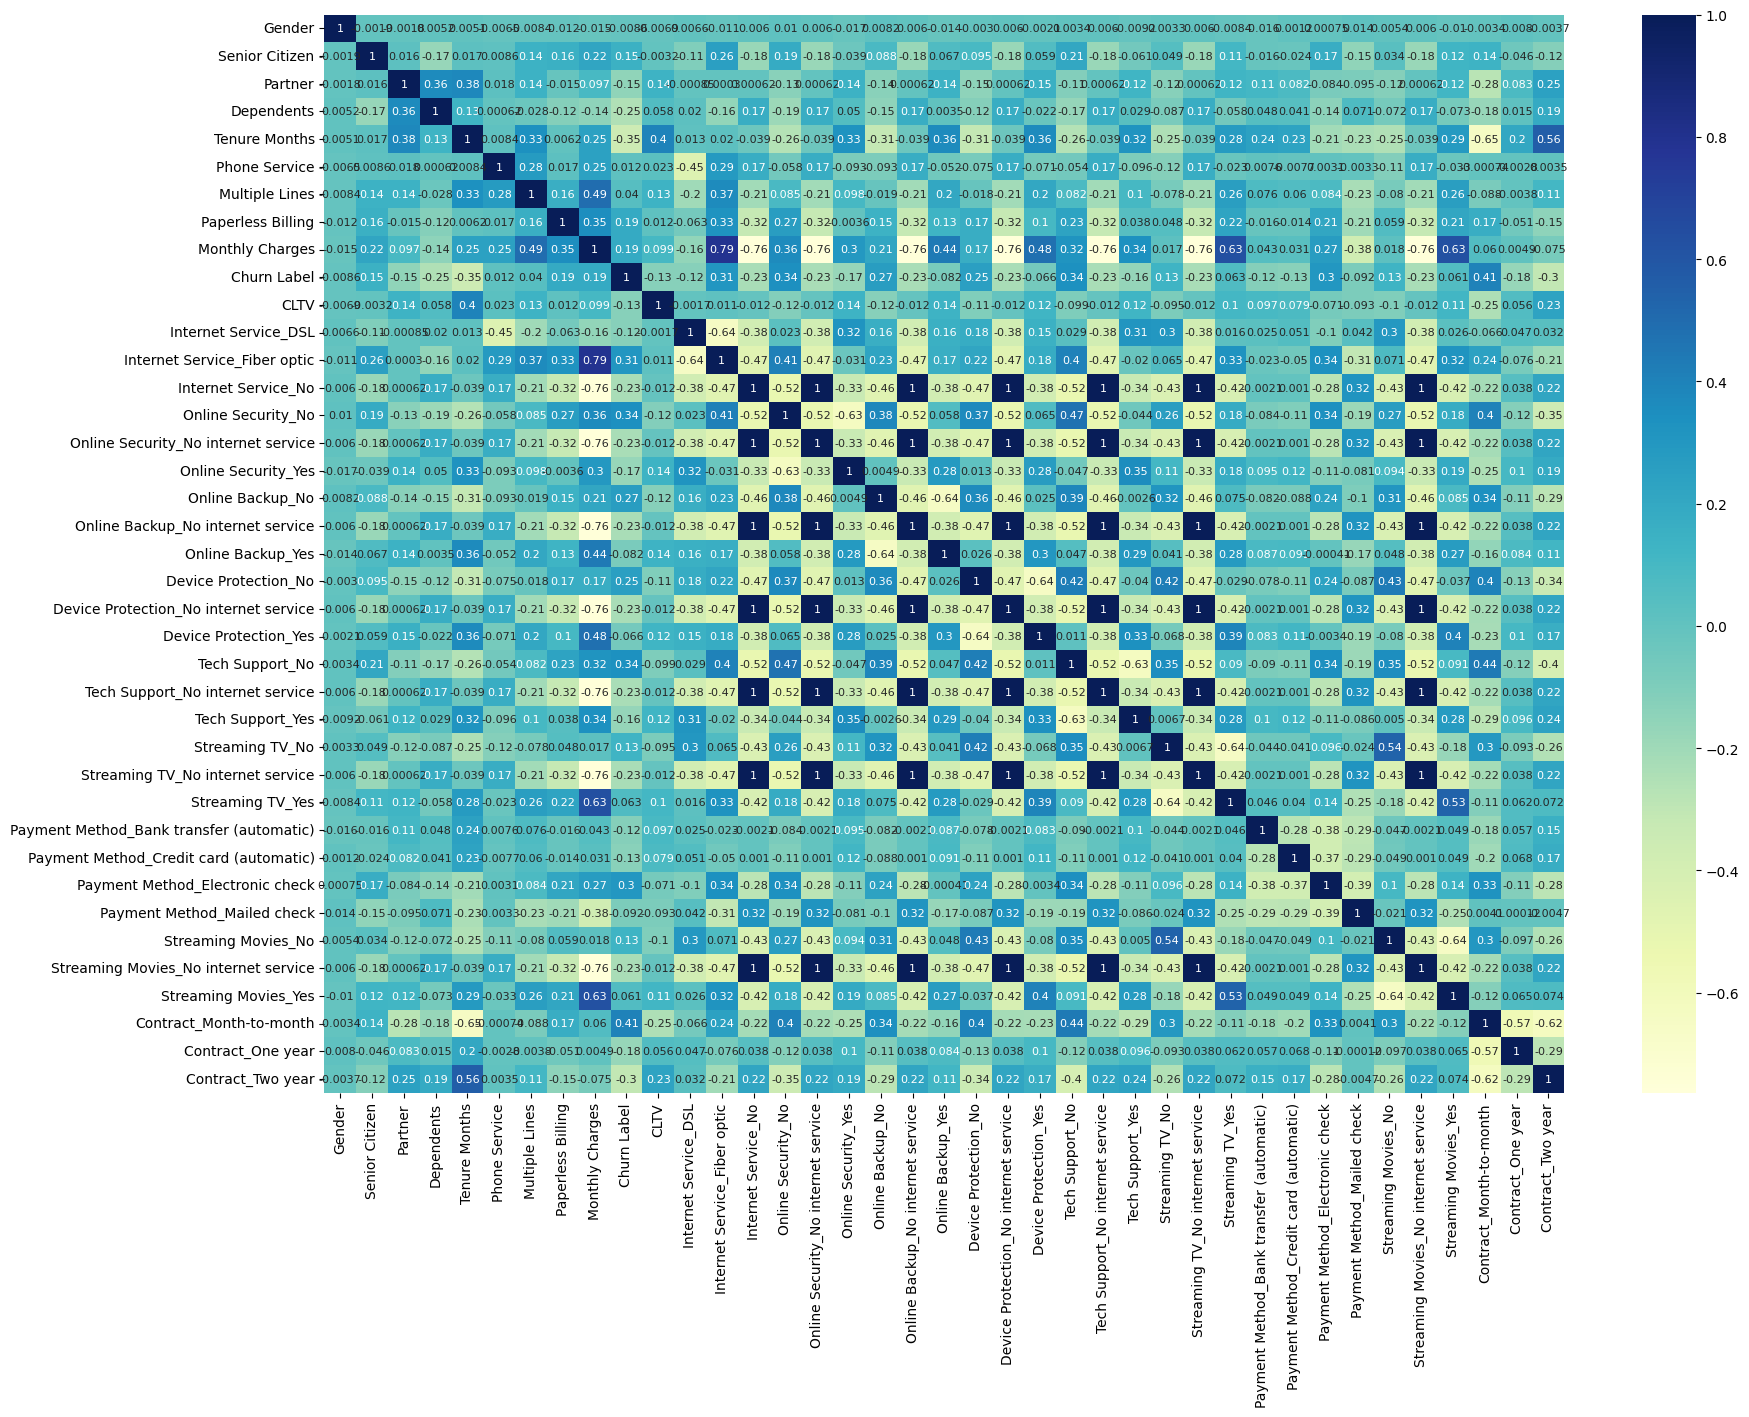

In [268]:
# it is really Hard to see the Correaltion here in the table. Lets plot Heatmap.
plt.figure(figsize= (20,14))
sns.heatmap(new_df.corr(),cmap='YlGnBu', annot = True,annot_kws={'fontsize': 8})
plt.show()

In [269]:
df['Internet Service'].value_counts()

Fiber optic    3096
DSL            2421
No             1526
Name: Internet Service, dtype: int64

In [270]:
df['Online Security'].value_counts() 

No                     3498
Yes                    2019
No internet service    1526
Name: Online Security, dtype: int64

###### No Internet Service means No online security, until and unless you have a internet accessible you can have online security.


In [271]:
# We are replacing the No internet service to 0 
df['Online Security'] = df['Online Security'].replace('No internet service','No')

In [272]:
df['Online Security'] = lb.fit_transform(df['Online Security'])

In [273]:
df['Online Security'].value_counts()

0    5024
1    2019
Name: Online Security, dtype: int64

In [274]:
df['Online Backup'].value_counts()

No                     3088
Yes                    2429
No internet service    1526
Name: Online Backup, dtype: int64

In [275]:
df['Online Backup'] = df['Online Backup'].replace('No internet service','No')

In [276]:
df['Online Backup'] = lb.fit_transform(df['Online Backup'])
df['Online Backup'].value_counts()

0    4614
1    2429
Name: Online Backup, dtype: int64

In [277]:
df['Device Protection'].value_counts()

No                     3095
Yes                    2422
No internet service    1526
Name: Device Protection, dtype: int64

In [278]:
df['Device Protection'] = df['Device Protection'].replace('No internet service','No')
df['Device Protection'] = lb.fit_transform(df['Device Protection'])

In [279]:
df['Device Protection'].value_counts()

0    4621
1    2422
Name: Device Protection, dtype: int64

In [280]:
 df['Tech Support'].value_counts()

No                     3473
Yes                    2044
No internet service    1526
Name: Tech Support, dtype: int64

In [281]:
df['Tech Support'] = df['Tech Support'].replace('No internet service','No')
df['Tech Support'] = lb.fit_transform(df['Tech Support'])
df['Tech Support'].value_counts()

0    4999
1    2044
Name: Tech Support, dtype: int64

In [282]:
df['Streaming TV'].value_counts()

No                     2810
Yes                    2707
No internet service    1526
Name: Streaming TV, dtype: int64

In [283]:
df['Streaming TV'] = df['Streaming TV'].replace('No internet service','No')
df['Streaming TV'] = lb.fit_transform(df['Streaming TV'])
df['Streaming TV'].value_counts()

0    4336
1    2707
Name: Streaming TV, dtype: int64

In [284]:
df['Streaming Movies'].value_counts()

No                     2785
Yes                    2732
No internet service    1526
Name: Streaming Movies, dtype: int64

In [285]:
df['Streaming Movies'] = df['Streaming Movies'].replace('No internet service','No')
df['Streaming Movies'] = lb.fit_transform(df['Streaming Movies'])
df['Streaming Movies'].value_counts()

0    4311
1    2732
Name: Streaming Movies, dtype: int64

In [286]:
df.head()

,Gender,Senior Citizen,Partner,Dependents,Tenure Months,Phone Service,Multiple Lines,Internet Service,Online Security,Online Backup,...,Tech Support,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,CLTV
0,1,0,0,0,2,1,0,DSL,1,1,...,0,0,0,Month-to-month,1,Mailed check,53.85,108.15,1,3239
1,0,0,0,1,2,1,0,Fiber optic,0,0,...,0,0,0,Month-to-month,1,Electronic check,70.70,151.65,1,2701
2,0,0,0,1,8,1,1,Fiber optic,0,0,...,0,1,1,Month-to-month,1,Electronic check,99.65,820.5,1,5372
3,0,0,1,1,28,1,1,Fiber optic,0,0,...,1,1,1,Month-to-month,1,Electronic check,104.80,3046.05,1,5003
4,1,0,0,1,49,1,1,Fiber optic,0,1,...,0,1,1,Month-to-month,1,Bank transfer (automatic),103.70,5036.3,1,5340


In [287]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             7043 non-null   int32  
 1   Senior Citizen     7043 non-null   int32  
 2   Partner            7043 non-null   int32  
 3   Dependents         7043 non-null   int32  
 4   Tenure Months      7043 non-null   int64  
 5   Phone Service      7043 non-null   int32  
 6   Multiple Lines     7043 non-null   int32  
 7   Internet Service   7043 non-null   object 
 8   Online Security    7043 non-null   int32  
 9   Online Backup      7043 non-null   int32  
 10  Device Protection  7043 non-null   int32  
 11  Tech Support       7043 non-null   int32  
 12  Streaming TV       7043 non-null   int32  
 13  Streaming Movies   7043 non-null   int32  
 14  Contract           7043 non-null   object 
 15  Paperless Billing  7043 non-null   int32  
 16  Payment Method     7043 

In [288]:
df['Monthly Charges'] = df['Monthly Charges'].astype(int)

In [289]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Gender             7043 non-null   int32 
 1   Senior Citizen     7043 non-null   int32 
 2   Partner            7043 non-null   int32 
 3   Dependents         7043 non-null   int32 
 4   Tenure Months      7043 non-null   int64 
 5   Phone Service      7043 non-null   int32 
 6   Multiple Lines     7043 non-null   int32 
 7   Internet Service   7043 non-null   object
 8   Online Security    7043 non-null   int32 
 9   Online Backup      7043 non-null   int32 
 10  Device Protection  7043 non-null   int32 
 11  Tech Support       7043 non-null   int32 
 12  Streaming TV       7043 non-null   int32 
 13  Streaming Movies   7043 non-null   int32 
 14  Contract           7043 non-null   object
 15  Paperless Billing  7043 non-null   int32 
 16  Payment Method     7043 non-null   object


In [290]:
# Now we can convert them into encoding variables by using gget_dummies.
new_df1 = pd.get_dummies(df,columns = ['Internet Service','Contract','Payment Method'])
new_df1.head()

,Gender,Senior Citizen,Partner,Dependents,Tenure Months,Phone Service,Multiple Lines,Online Security,Online Backup,Device Protection,...,Internet Service_DSL,Internet Service_Fiber optic,Internet Service_No,Contract_Month-to-month,Contract_One year,Contract_Two year,Payment Method_Bank transfer (automatic),Payment Method_Credit card (automatic),Payment Method_Electronic check,Payment Method_Mailed check
0,1,0,0,0,2,1,0,1,1,0,...,1,0,0,1,0,0,0,0,0,1
1,0,0,0,1,2,1,0,0,0,0,...,0,1,0,1,0,0,0,0,1,0
2,0,0,0,1,8,1,1,0,0,1,...,0,1,0,1,0,0,0,0,1,0
3,0,0,1,1,28,1,1,0,0,1,...,0,1,0,1,0,0,0,0,1,0
4,1,0,0,1,49,1,1,0,1,1,...,0,1,0,1,0,0,1,0,0,0


In [291]:
new_df1.isnull().sum()

Gender                                      0
Senior Citizen                              0
Partner                                     0
Dependents                                  0
Tenure Months                               0
Phone Service                               0
Multiple Lines                              0
Online Security                             0
Online Backup                               0
Device Protection                           0
Tech Support                                0
Streaming TV                                0
Streaming Movies                            0
Paperless Billing                           0
Monthly Charges                             0
Total Charges                               0
Churn Label                                 0
CLTV                                        0
Internet Service_DSL                        0
Internet Service_Fiber optic                0
Internet Service_No                         0
Contract_Month-to-month           

In [292]:
new_df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 28 columns):
 #   Column                                    Non-Null Count  Dtype 
---  ------                                    --------------  ----- 
 0   Gender                                    7043 non-null   int32 
 1   Senior Citizen                            7043 non-null   int32 
 2   Partner                                   7043 non-null   int32 
 3   Dependents                                7043 non-null   int32 
 4   Tenure Months                             7043 non-null   int64 
 5   Phone Service                             7043 non-null   int32 
 6   Multiple Lines                            7043 non-null   int32 
 7   Online Security                           7043 non-null   int32 
 8   Online Backup                             7043 non-null   int32 
 9   Device Protection                         7043 non-null   int32 
 10  Tech Support                              7043 n

In [293]:
new_df1['Total Charges'].value_counts()

20.2      11
          11
19.75      9
19.65      8
20.05      8
          ..
444.75     1
5459.2     1
295.95     1
394.1      1
6844.5     1
Name: Total Charges, Length: 6531, dtype: int64

In [294]:
new_df1['Total Charges'] = pd.to_numeric(new_df1['Total Charges'], errors='coerce')

new_df1['Total Charges'] = new_df1['Total Charges'].astype(float)

In [295]:
new_df1.isnull().sum()

Gender                                       0
Senior Citizen                               0
Partner                                      0
Dependents                                   0
Tenure Months                                0
Phone Service                                0
Multiple Lines                               0
Online Security                              0
Online Backup                                0
Device Protection                            0
Tech Support                                 0
Streaming TV                                 0
Streaming Movies                             0
Paperless Billing                            0
Monthly Charges                              0
Total Charges                               11
Churn Label                                  0
CLTV                                         0
Internet Service_DSL                         0
Internet Service_Fiber optic                 0
Internet Service_No                          0
Contract_Mont

In [296]:
new_df1.dropna(axis = 0, inplace =True )


In [297]:
new_df1.shape

(7032, 28)

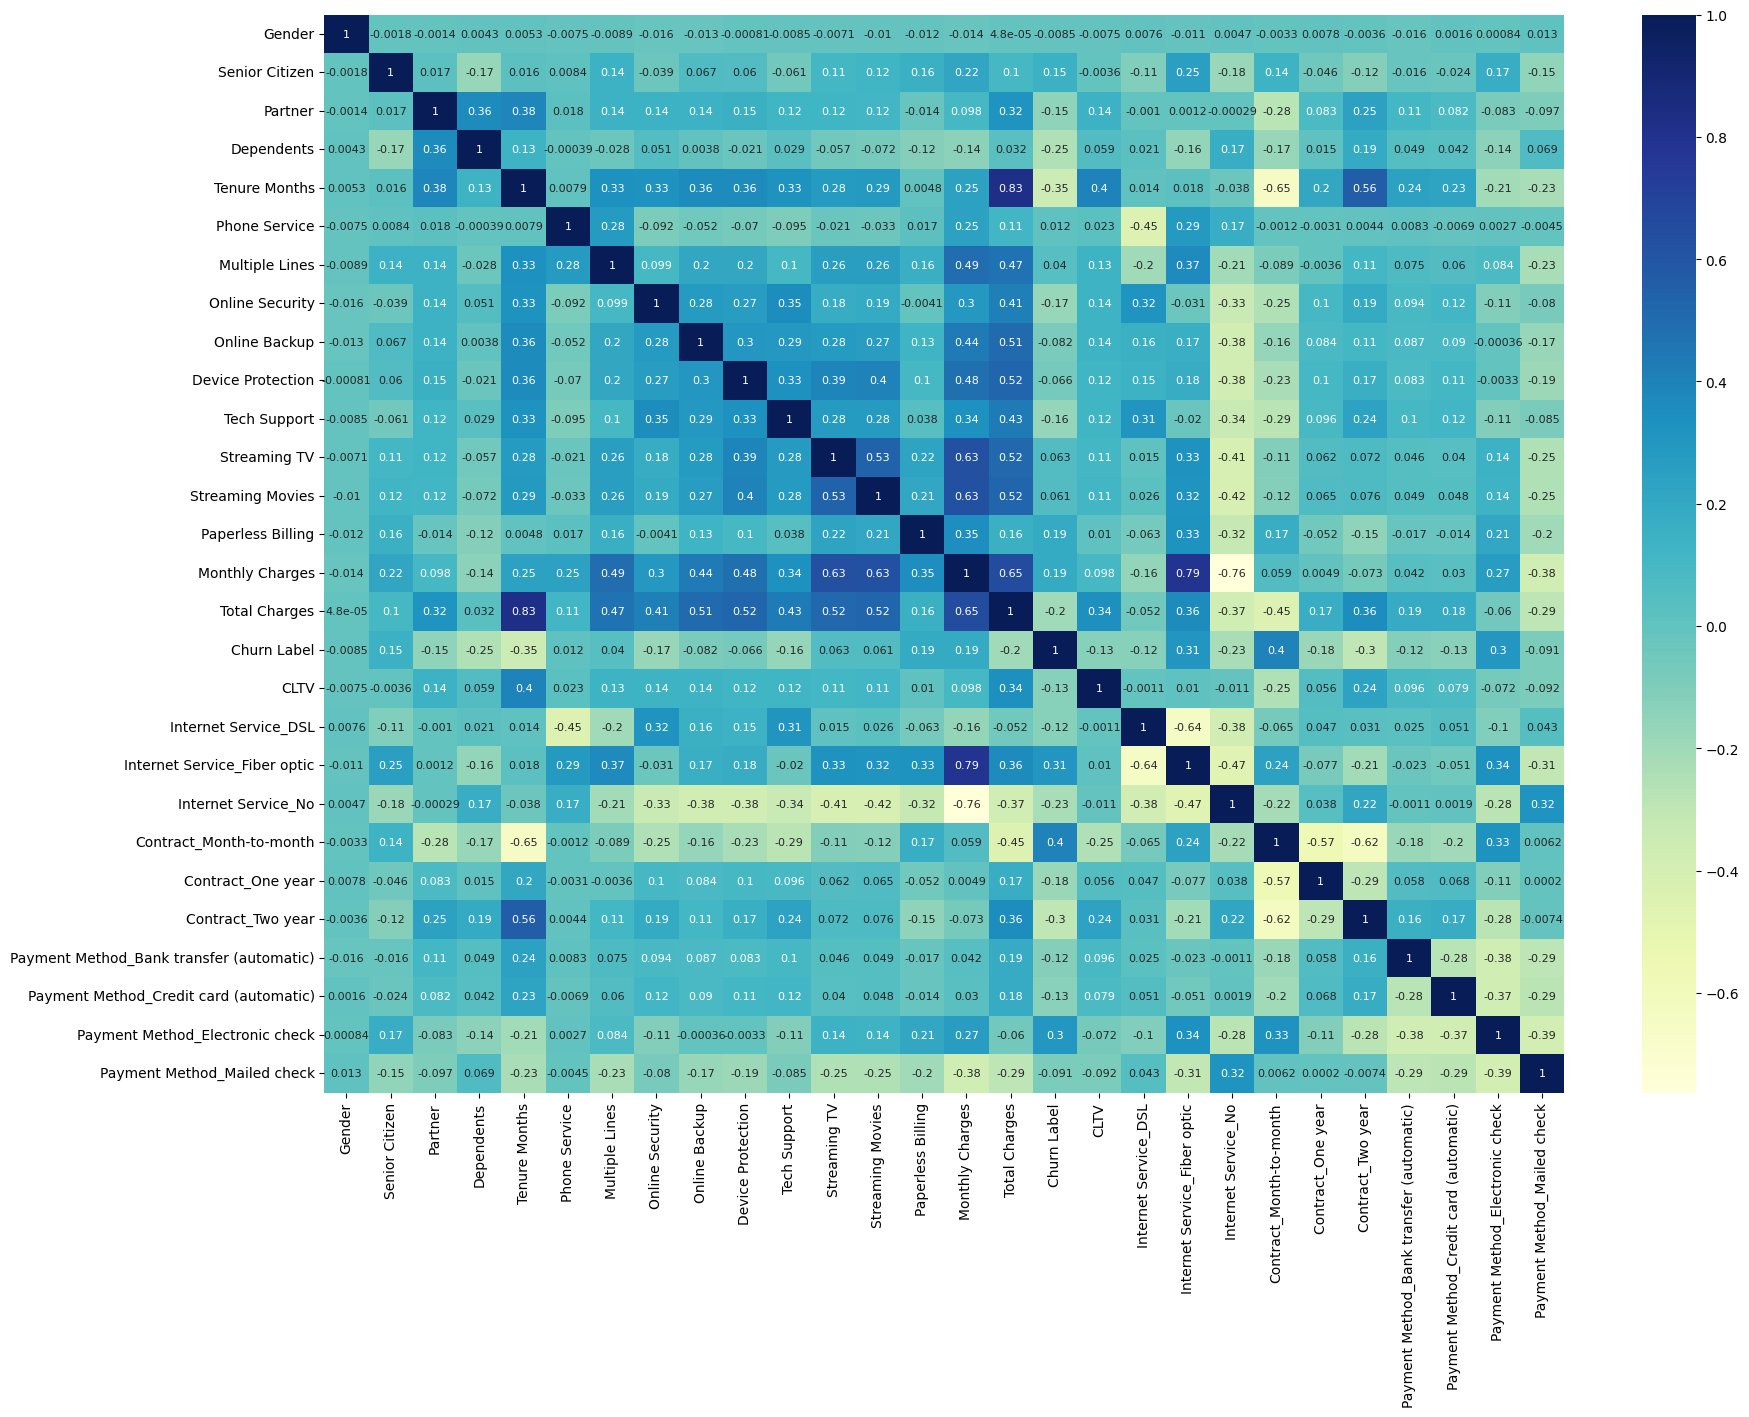

In [298]:
plt.figure(figsize= (20,14))
sns.heatmap(new_df1.corr(),cmap='YlGnBu', annot = True,annot_kws={'fontsize': 8})
plt.show()


In [299]:
new_df1.to_csv('C-Data/modified_data.csv')

## **Feature Selection ✌️**


- Our Target Variable is Churn Label - so we mainly focus on the target variable.

- contract-month-to-month had good correlation with Churn.
- PaymentMethod_Electronic Check Had Good corelation with Churn.


## **Splitting the Data**

In [300]:
X = new_df1.drop('Churn Label', axis = 1)

In [301]:
y = new_df1['Churn Label']

In [302]:
X.head(3)

,Gender,Senior Citizen,Partner,Dependents,Tenure Months,Phone Service,Multiple Lines,Online Security,Online Backup,Device Protection,...,Internet Service_DSL,Internet Service_Fiber optic,Internet Service_No,Contract_Month-to-month,Contract_One year,Contract_Two year,Payment Method_Bank transfer (automatic),Payment Method_Credit card (automatic),Payment Method_Electronic check,Payment Method_Mailed check
0,1,0,0,0,2,1,0,1,1,0,...,1,0,0,1,0,0,0,0,0,1
1,0,0,0,1,2,1,0,0,0,0,...,0,1,0,1,0,0,0,0,1,0
2,0,0,0,1,8,1,1,0,0,1,...,0,1,0,1,0,0,0,0,1,0


In [303]:
X.shape

(7032, 27)

In [304]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: Churn Label, dtype: int32

In [305]:
y.shape

(7032,)

## **Model Building 😏**

In [306]:
from sklearn.model_selection import train_test_split as tts
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB,BernoulliNB,GaussianNB
from sklearn.tree import DecisionTreeClassifier
from imblearn.combine import SMOTEENN 
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import accuracy_score, precision_score, confusion_matrix

In [307]:
X_train,X_test,y_train,y_test = tts(X,y,test_size= 0.2, random_state= 42)
X_train.head()

,Gender,Senior Citizen,Partner,Dependents,Tenure Months,Phone Service,Multiple Lines,Online Security,Online Backup,Device Protection,...,Internet Service_DSL,Internet Service_Fiber optic,Internet Service_No,Contract_Month-to-month,Contract_One year,Contract_Two year,Payment Method_Bank transfer (automatic),Payment Method_Credit card (automatic),Payment Method_Electronic check,Payment Method_Mailed check
6030,1,0,1,0,24,1,1,0,0,0,...,0,1,0,1,0,0,0,0,1,0
3409,0,0,1,0,40,1,1,0,0,0,...,0,1,0,1,0,0,0,1,0,0
5482,1,0,1,0,4,1,1,0,0,1,...,1,0,0,1,0,0,0,0,1,0
5523,0,0,0,0,4,1,0,0,0,0,...,1,0,0,1,0,0,0,1,0,0
6337,0,0,1,1,64,1,1,0,0,0,...,0,0,1,0,1,0,0,0,0,1


In [308]:
print('X-Train - ', X_train.shape)
print('X-Test - ', X_test.shape)

X-Train -  (5625, 27)
X-Test -  (1407, 27)


In [309]:
y_train.head()

6030    0
3409    0
5482    0
5523    0
6337    0
Name: Churn Label, dtype: int32

In [310]:
y_train.shape

(5625,)

### **Logistic Regression**

In [311]:
lg = LogisticRegression()
lg.fit(X_train,y_train)

LogisticRegression()

In [312]:
y_pred = lg.predict(X_test)
lg.score(X_test, y_pred)

1.0

In [313]:
accuracy_score(y_test,y_pred)

0.806680881307747

In [314]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.90      0.87      1012
           1       0.69      0.56      0.62       395

    accuracy                           0.81      1407
   macro avg       0.77      0.73      0.74      1407
weighted avg       0.80      0.81      0.80      1407



- Let's Analyze Confusion Matrix

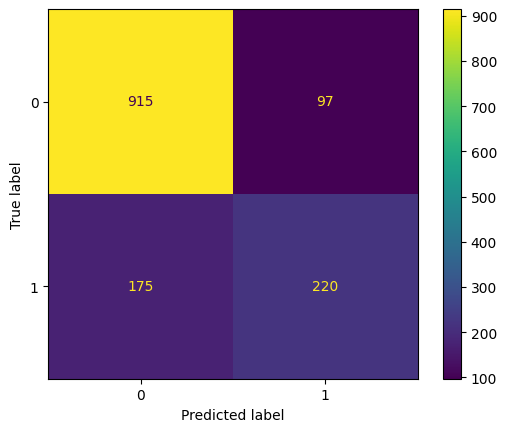

In [315]:
confusion_matrix = metrics.confusion_matrix(y_test,y_pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix)
cm_display.plot()
plt.show()

### **Naive Bayes**

In [316]:
bnb = BernoulliNB()
mnb = MultinomialNB()
gnb = GaussianNB()

In [317]:
bnb.fit(X_train,y_train)

BernoulliNB()

In [318]:
mnb.fit(X_train,y_train)

MultinomialNB()

In [319]:
gnb.fit(X_train,y_train)

GaussianNB()

In [320]:
y_pred1 = bnb.predict(X_test)
y_pred2 = mnb.predict(X_test)
y_pred3 = gnb.predict(X_test)

In [321]:
print(bnb.score(X_test, y_pred1))
print(mnb.score(X_test, y_pred2))
print(gnb.score(X_test, y_pred3))

1.0
1.0
1.0


In [322]:
print(accuracy_score(y_test,y_pred1))
print(accuracy_score(y_test,y_pred2))
print(accuracy_score(y_test,y_pred3))

0.7711442786069652
0.5515280739161336
0.7562189054726368


In [323]:
#BNB
print(classification_report(y_test, y_pred1))

              precision    recall  f1-score   support

           0       0.88      0.79      0.83      1012
           1       0.57      0.72      0.64       395

    accuracy                           0.77      1407
   macro avg       0.73      0.75      0.74      1407
weighted avg       0.79      0.77      0.78      1407



In [324]:
#MNB
print(classification_report(y_test, y_pred2))

              precision    recall  f1-score   support

           0       0.81      0.49      0.61      1012
           1       0.35      0.70      0.47       395

    accuracy                           0.55      1407
   macro avg       0.58      0.60      0.54      1407
weighted avg       0.68      0.55      0.57      1407



In [325]:
#GNB
print(classification_report(y_test, y_pred3))

              precision    recall  f1-score   support

           0       0.90      0.75      0.81      1012
           1       0.55      0.78      0.64       395

    accuracy                           0.76      1407
   macro avg       0.72      0.76      0.73      1407
weighted avg       0.80      0.76      0.77      1407



In [326]:
#BNB
print('BNB Matrix: ',metrics.confusion_matrix(y_pred1, y_test))
#MNB
print('____________')
print('MNB Matrix: ',metrics.confusion_matrix(y_pred2, y_test))
#GNB
print('____________')
print('GNB Matrix: ',metrics.confusion_matrix(y_pred3, y_test))

BNB Matrix:  [[802 112]
 [210 283]]
____________
MNB Matrix:  [[499 118]
 [513 277]]
____________
GNB Matrix:  [[755  86]
 [257 309]]


### **Decision Tree Classifier**

In [327]:
dtc = DecisionTreeClassifier(criterion = "gini",random_state = 100,max_depth=6, min_samples_leaf=8)
dtc.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=6, min_samples_leaf=8, random_state=100)

In [328]:
y_pred = dtc.predict(X_test)

In [329]:
print(dtc.score(X_test, y_pred))

1.0


In [330]:
print(accuracy_score(y_test,y_pred))

0.7917555081734187


In [331]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.87      0.86      1012
           1       0.64      0.60      0.62       395

    accuracy                           0.79      1407
   macro avg       0.74      0.73      0.74      1407
weighted avg       0.79      0.79      0.79      1407



In [332]:
print(metrics.confusion_matrix(y_pred, y_test))

[[877 158]
 [135 237]]


### **Random Forest Classifier**

In [333]:
rfc = RandomForestClassifier(n_estimators=100, criterion='gini', random_state = 100,max_depth=6, min_samples_leaf=8)

In [334]:
rfc.fit(X_train,y_train)

RandomForestClassifier(max_depth=6, min_samples_leaf=8, random_state=100)

In [335]:
y_pred = rfc.predict(X_test)

In [336]:
print(rfc.score(X_test, y_pred))

1.0


In [337]:
print(accuracy_score(y_test,y_pred))

0.8009950248756219


In [338]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.92      0.87      1012
           1       0.71      0.49      0.58       395

    accuracy                           0.80      1407
   macro avg       0.77      0.71      0.72      1407
weighted avg       0.79      0.80      0.79      1407



### **Smote**


In [341]:
sm = SMOTEENN()
X_resampled1, y_resampled1 = sm.fit_resample(X,y)

In [342]:
X_train1,X_test1,y_train1,y_test1=tts(X_resampled1, y_resampled1,test_size=0.2)

- Our Data is oversampled Using SMOTE.
- Now we will see all the models once again after oversampling.

### Logistic Regression After SMOTE

In [343]:
lgs = LogisticRegression()
lgs.fit(X_train1,y_train1)

LogisticRegression()

In [344]:
yr_pred1 = lgs.predict(X_test1)

In [345]:
lgs.score(X_test1,yr_pred1)

1.0

In [346]:
print(accuracy_score(y_test1,yr_pred1))

0.921003717472119


In [347]:
print(metrics.classification_report(y_test1, yr_pred1))

              precision    recall  f1-score   support

           0       0.92      0.90      0.91       474
           1       0.92      0.94      0.93       602

    accuracy                           0.92      1076
   macro avg       0.92      0.92      0.92      1076
weighted avg       0.92      0.92      0.92      1076



In [348]:
print(metrics.confusion_matrix(y_test1, yr_pred1))

[[428  46]
 [ 39 563]]


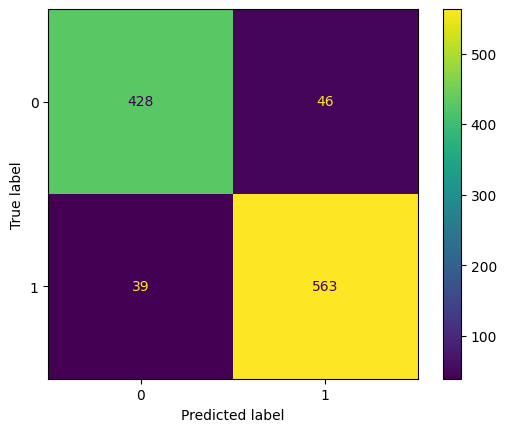

In [349]:
confusion_matrix = metrics.confusion_matrix(y_test1,yr_pred1)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix)
cm_display.plot()
plt.show()


### Navie Bayes after SMOTE

In [350]:
bnb = BernoulliNB()
mnb = MultinomialNB()
gnb = GaussianNB()

In [351]:
bnb.fit(X_train1,y_train1)

BernoulliNB()

In [352]:
mnb.fit(X_train1,y_train1)

MultinomialNB()

In [353]:
gnb.fit(X_train1,y_train1)

GaussianNB()

In [354]:
yr_pred1 = bnb.predict(X_test1)
yr_pred2 = mnb.predict(X_test1)
yr_pred3 = gnb.predict(X_test1)
print(bnb.score(X_test1, yr_pred1))
print(mnb.score(X_test1, yr_pred2))
print(gnb.score(X_test1, yr_pred3))


1.0
1.0
1.0


In [355]:
print(accuracy_score(y_test1,yr_pred1))
print(accuracy_score(y_test1,yr_pred2))
print(accuracy_score(y_test1,yr_pred3))

0.8782527881040892
0.6598513011152416
0.9079925650557621


In [356]:
#BNB
print(classification_report(y_test1, yr_pred1))

              precision    recall  f1-score   support

           0       0.90      0.81      0.85       474
           1       0.86      0.93      0.90       602

    accuracy                           0.88      1076
   macro avg       0.88      0.87      0.87      1076
weighted avg       0.88      0.88      0.88      1076



In [357]:
#MNB
print(classification_report(y_test1, yr_pred2))

              precision    recall  f1-score   support

           0       0.65      0.50      0.56       474
           1       0.67      0.79      0.72       602

    accuracy                           0.66      1076
   macro avg       0.66      0.64      0.64      1076
weighted avg       0.66      0.66      0.65      1076



In [358]:
#GNB
print(classification_report(y_test1, yr_pred3))

              precision    recall  f1-score   support

           0       0.89      0.91      0.90       474
           1       0.93      0.91      0.92       602

    accuracy                           0.91      1076
   macro avg       0.91      0.91      0.91      1076
weighted avg       0.91      0.91      0.91      1076



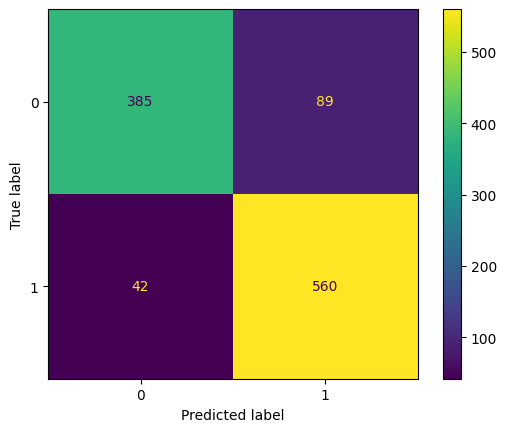

In [359]:
confusion_matrix = metrics.confusion_matrix(y_test1,yr_pred1)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix)
cm_display.plot()
plt.show()

In [360]:
print(metrics.confusion_matrix(y_test1, yr_pred2))

[[237 237]
 [129 473]]


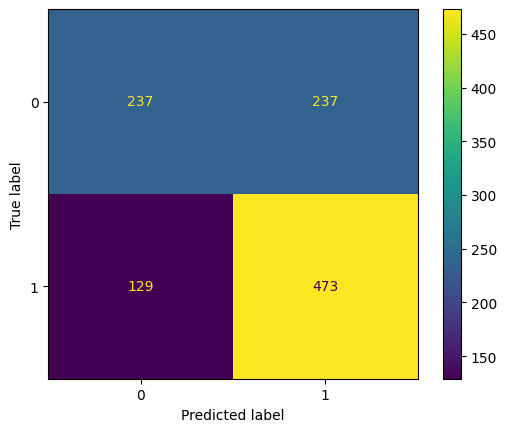

In [361]:
confusion_matrix = metrics.confusion_matrix(y_test1,yr_pred2)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix)
cm_display.plot()
plt.show()

In [362]:
print(metrics.confusion_matrix(y_test1, yr_pred3))

[[430  44]
 [ 55 547]]


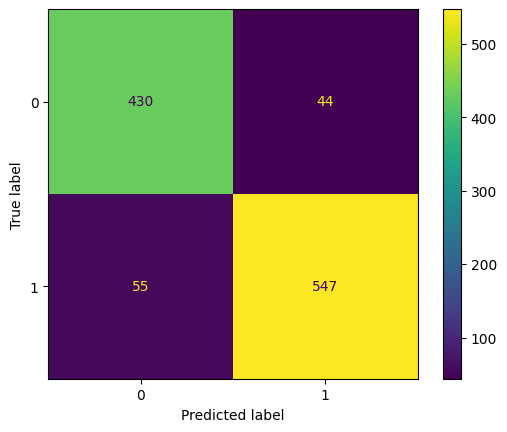

In [363]:
confusion_matrix = metrics.confusion_matrix(y_test1,yr_pred3)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix)
cm_display.plot()
plt.show()

### Decision Tree Classifier after SMOTE

In [364]:
dtc = DecisionTreeClassifier(criterion = "gini",random_state = 100,max_depth=6, min_samples_leaf=8)
dtc.fit(X_train1,y_train1)

DecisionTreeClassifier(max_depth=6, min_samples_leaf=8, random_state=100)

In [365]:
yr_pred = dtc.predict(X_test1)
print(dtc.score(X_test1, yr_pred))

1.0


In [366]:
print(accuracy_score(y_test1,yr_pred))

0.9163568773234201


In [367]:
print(classification_report(y_test1, yr_pred))

              precision    recall  f1-score   support

           0       0.93      0.87      0.90       474
           1       0.90      0.95      0.93       602

    accuracy                           0.92      1076
   macro avg       0.92      0.91      0.91      1076
weighted avg       0.92      0.92      0.92      1076



In [368]:
print(metrics.confusion_matrix(y_test1, yr_pred))

[[413  61]
 [ 29 573]]


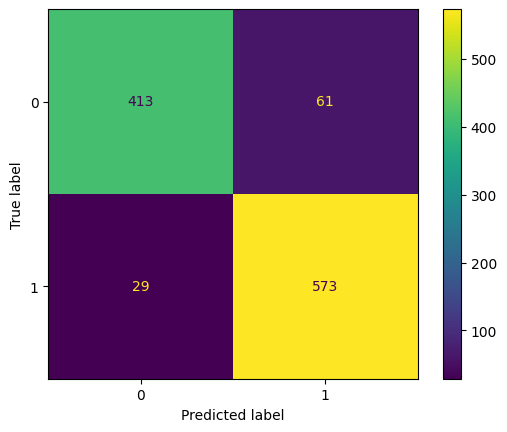

In [369]:
confusion_matrix = metrics.confusion_matrix(y_test1,yr_pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix)
cm_display.plot()
plt.show()

### Random Forest Classifier after SMOTE

In [370]:
rfcr=RandomForestClassifier(n_estimators=100, criterion='gini', random_state = 100,max_depth=6, min_samples_leaf=8)
rfcr.fit(X_train1,y_train1)


RandomForestClassifier(max_depth=6, min_samples_leaf=8, random_state=100)

In [373]:
yr_pred1 = rfcr.predict(X_test1)
rfcr.score(X_test1, y_test1)

0.9172862453531598

In [372]:
print(metrics.classification_report(y_test1, yr_pred1))

              precision    recall  f1-score   support

           0       0.94      0.87      0.90       474
           1       0.90      0.96      0.93       602

    accuracy                           0.92      1076
   macro avg       0.92      0.91      0.92      1076
weighted avg       0.92      0.92      0.92      1076



In [374]:
print(metrics.confusion_matrix(y_test1, yr_pred1))

[[412  62]
 [ 27 575]]


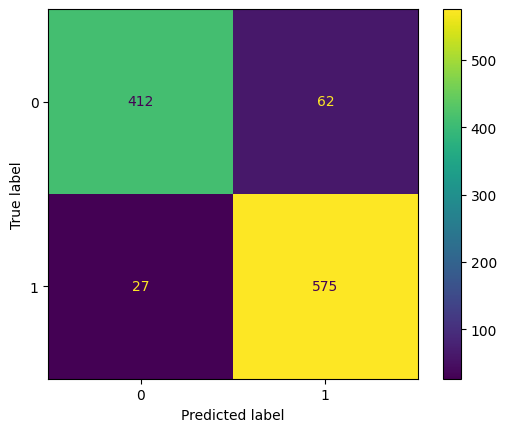

In [375]:
confusion_matrix = metrics.confusion_matrix(y_test1,yr_pred1)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix)
cm_display.plot()
plt.show()

## **Model Saving ✅**

In [377]:
import pickle

In [378]:
pickle.dump(lgs, open('Model/churn_model.pkl', 'wb'))

In [380]:
# Checking if our model is working or not. 
load_model = pickle.load(open('Model/churn_model.pkl', 'rb'))
load_model = load_model.score(X_test1,yr_pred1)

In [381]:
load_model

0.9479553903345725

**Future Work**
- Deployment of this model into Production.

######                                                                   Kartik Dhiman